Importing Libraries

In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
import math
import numpy as np
import matplotlib.pyplot as plt

Loading Datasets

In [138]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [139]:
train_df = train_df.fillna(0)
test_df = test_df.fillna(0)

for cross validation in future

In [4]:
msk = np.random.rand(len(train_df)) < 0.8

In [5]:
train = train_df[msk]
test = train_df[~msk]

In [6]:
train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave     0      Reg   
1456  1457          20       RL         85.0    13175   Pave     0      Reg   
1457  1458          70       RL         66.0     9042   Pave     0      Reg   
1458  1459          20       RL         68.0     9717   Pave     0      Reg   
1459  1460          20       RL         75.0     9937   Pave     0      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0      0      0           0       0   
1456         Lvl    AllPub  ...        0      0  MnPrv           0       0   
1457         Lvl    AllPub  ...        0      0  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0      0      0           0       0   
1459         Lvl    AllPub  ...        0      0      0           0       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [7]:
train.shape, test.shape

((1174, 81), (286, 81))

In [8]:
def plotData(x, y):
    
    fig = plt.figure()
    
    plt.plot(x, y,'go', ms=10, mec='k')
    plt.show()

Checking dependence on numerical parameters

In [9]:
a = train_df.columns
pd.DataFrame(a)

0
0              Id
1      MSSubClass
2        MSZoning
3     LotFrontage
4         LotArea
5          Street
6           Alley
7        LotShape
8     LandContour
9       Utilities
10      LotConfig
11      LandSlope
12   Neighborhood
13     Condition1
14     Condition2
15       BldgType
16     HouseStyle
17    OverallQual
18    OverallCond
19      YearBuilt
20   YearRemodAdd
21      RoofStyle
22       RoofMatl
23    Exterior1st
24    Exterior2nd
25     MasVnrType
26     MasVnrArea
27      ExterQual
28      ExterCond
29     Foundation
..            ...
51   BedroomAbvGr
52   KitchenAbvGr
53    KitchenQual
54   TotRmsAbvGrd
55     Functional
56     Fireplaces
57    FireplaceQu
58     GarageType
59    GarageYrBlt
60   GarageFinish
61     GarageCars
62     GarageArea
63     GarageQual
64     GarageCond
65     PavedDrive
66     WoodDeckSF
67    OpenPorchSF
68  EnclosedPorch
69      3SsnPorch
70    ScreenPorch
71       PoolArea
72         PoolQC
73          Fence
74    MiscFeature
75        MiscVal
76         MoSold
77         YrSold
78       SaleType
79  SaleCondition
80      SalePrice

[81 rows x 1 columns]

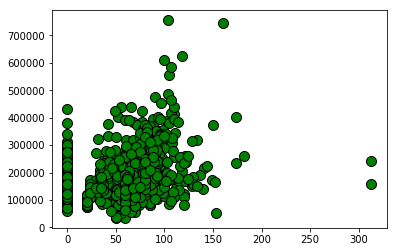

In [10]:
plotData(train.iloc[:,3],train.iloc[:,80])

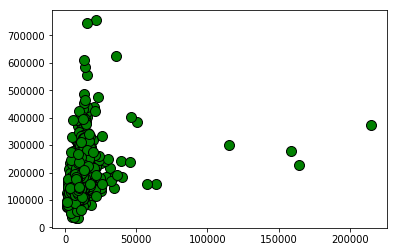

In [11]:
plotData(train.iloc[:,4],train.iloc[:,80])

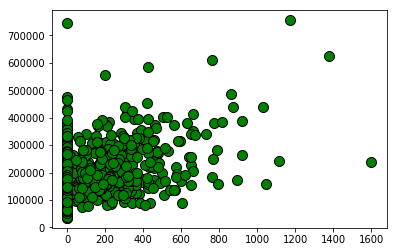

In [12]:
plotData(train.iloc[:,26],train.iloc[:,80])

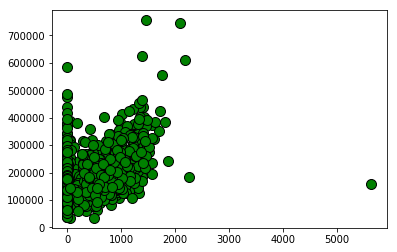

In [13]:
plotData(train.iloc[:,34],train.iloc[:,80])

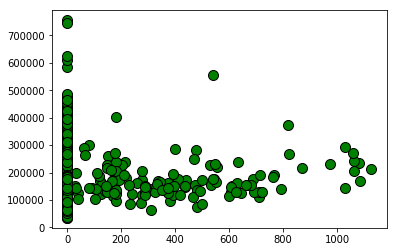

In [14]:
plotData(train.iloc[:,36],train.iloc[:,80])

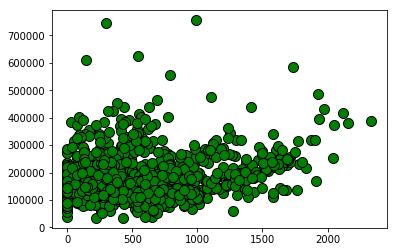

In [15]:

plotData(train.iloc[:,37],train.iloc[:,80])

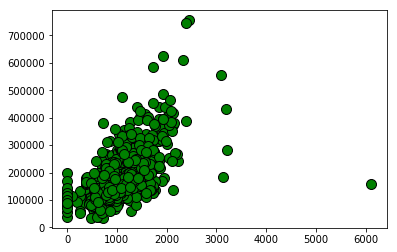

In [16]:
plotData(train.iloc[:,38],train.iloc[:,80])

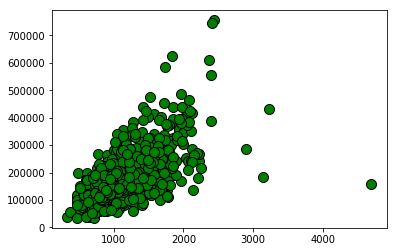

In [17]:
plotData(train.iloc[:,43],train.iloc[:,80])

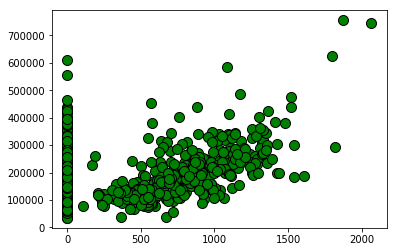

In [18]:
plotData(train.iloc[:,44],train.iloc[:,80])

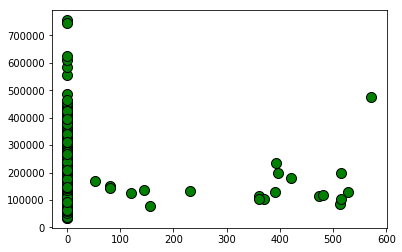

In [19]:
plotData(train.iloc[:,45],train.iloc[:,80])

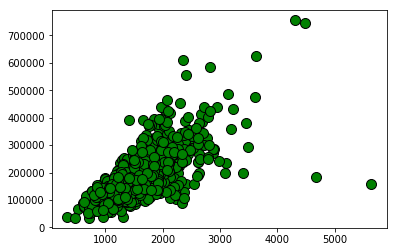

In [20]:
plotData(train.iloc[:,46],train.iloc[:,80])

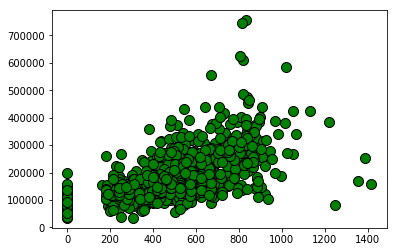

In [21]:
plotData(train.iloc[:,62],train.iloc[:,80])

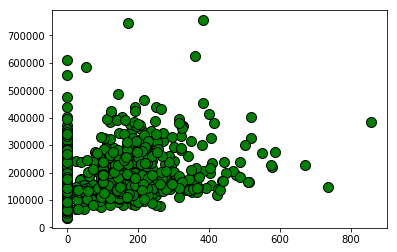

In [22]:
plotData(train.iloc[:,66],train.iloc[:,80])

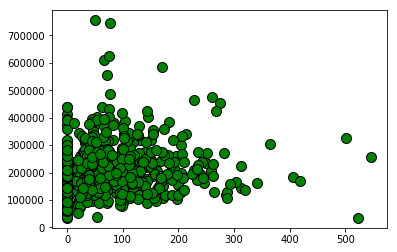

In [23]:
plotData(train.iloc[:,67],train.iloc[:,80])

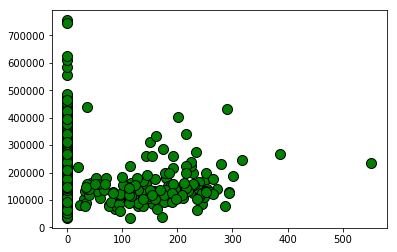

In [24]:
plotData(train.iloc[:,68],train.iloc[:,80])

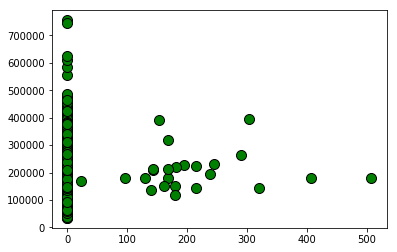

In [25]:
plotData(train.iloc[:,69],train.iloc[:,80])

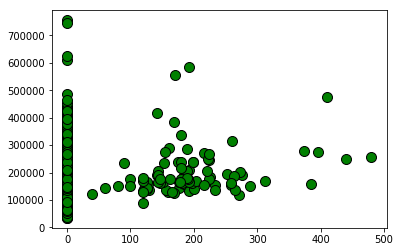

In [26]:
plotData(train.iloc[:,70],train.iloc[:,80])

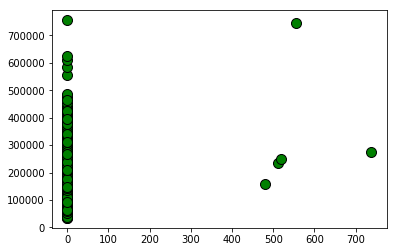

In [27]:
plotData(train.iloc[:,71],train.iloc[:,80])

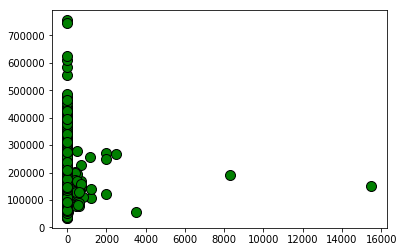

In [28]:
plotData(train.iloc[:,75],train.iloc[:,80])

In [29]:
def R2_score(X, regr, y):
    X = np.nan_to_num(X)
    h = np.dot(X,regr.coef_)+regr.intercept_
    ssr=0
    for i in range(h.size):
        var = h[i]-y[i]
        ssr = ssr+(var*var)
    sst=0
    for i in range(h.size):
        var = y.mean()-y[i]
        sst = sst+(var*var)
    r2_score = 1 - (ssr/sst)
    return r2_score

In [30]:
def RMSE(X, regr, y):
    h = np.dot(X,regr.coef_)+regr.intercept_
    ssr=0
    for i in range(h.size):
        var = h[i]-y[i]
        ssr = ssr+(var*var)
    return math.sqrt(ssr/(h.size))

In [31]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.DataFrame(a)

0
0              Id
1      MSSubClass
2        MSZoning
3     LotFrontage
4         LotArea
5          Street
6           Alley
7        LotShape
8     LandContour
9       Utilities
10      LotConfig
11      LandSlope
12   Neighborhood
13     Condition1
14     Condition2
15       BldgType
16     HouseStyle
17    OverallQual
18    OverallCond
19      YearBuilt
20   YearRemodAdd
21      RoofStyle
22       RoofMatl
23    Exterior1st
24    Exterior2nd
25     MasVnrType
26     MasVnrArea
27      ExterQual
28      ExterCond
29     Foundation
30       BsmtQual
31       BsmtCond
32   BsmtExposure
33   BsmtFinType1
34     BsmtFinSF1
35   BsmtFinType2
36     BsmtFinSF2
37      BsmtUnfSF
38    TotalBsmtSF
39        Heating
40      HeatingQC
41     CentralAir
42     Electrical
43       1stFlrSF
44       2ndFlrSF
45   LowQualFinSF
46      GrLivArea
47   BsmtFullBath
48   BsmtHalfBath
49       FullBath
50       HalfBath
51   BedroomAbvGr
52   KitchenAbvGr
53    KitchenQual
54   TotRmsAbvGrd
55     Functional
56     Fireplaces
57    FireplaceQu
58     GarageType
59    GarageYrBlt
60   GarageFinish
61     GarageCars
62     GarageArea
63     GarageQual
64     GarageCond
65     PavedDrive
66     WoodDeckSF
67    OpenPorchSF
68  EnclosedPorch
69      3SsnPorch
70    ScreenPorch
71       PoolArea
72         PoolQC
73          Fence
74    MiscFeature
75        MiscVal
76         MoSold
77         YrSold
78       SaleType
79  SaleCondition
80      SalePrice

In [32]:
lst = ['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']

Let us assume linear dependence

In [33]:
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

array([0.7545785])

Now let us check for plausible chances of parabolical dependence

In [35]:
train['BsmtFinSF12'] = train['BsmtFinSF1']*train['BsmtFinSF1']
test['BsmtFinSF12'] = test['BsmtFinSF1']*test['BsmtFinSF1']
train['BsmtFinSF1c'] = 1
test['BsmtFinSF1c'] = 1

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [36]:
lst.append('BsmtFinSF12')
lst.append('BsmtFinSF1c')

In [37]:
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

array([0.7565669])

In [39]:
train['BsmtFinSF22'] = train['BsmtFinSF2']*train['BsmtFinSF2']
test['BsmtFinSF22'] = test['BsmtFinSF2']*test['BsmtFinSF2']
train['BsmtFinSF2c'] = 1
test['BsmtFinSF2c'] = 1

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [40]:
lst = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
lst.append('BsmtFinSF22')
lst.append('BsmtFinSF2c')

In [41]:
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

array([0.75456306])

In [43]:
train['BsmtUnfSF2'] = train['BsmtUnfSF']*train['BsmtUnfSF']
test['BsmtUnfSF2'] = test['BsmtUnfSF']*test['BsmtUnfSF']
train['BsmtUnfSFc'] = 1
test['BsmtUnfSFc'] = 1
lst = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
lst.append('BsmtUnfSF2')
lst.append('BsmtUnfSFc')
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

array([0.75879639])

In [44]:
train['TotalBsmtSF2'] = train['TotalBsmtSF']*train['TotalBsmtSF']
test['TotalBsmtSF2'] = test['TotalBsmtSF']*test['TotalBsmtSF']
train['TotalBsmtSFc'] = 1
test['TotalBsmtSFc'] = 1
lst = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
lst.append('TotalBsmtSF2')
lst.append('TotalBsmtSFc')
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

array([0.75876138])

In [45]:
train['2ndFlrSF2'] = train['2ndFlrSF']*train['2ndFlrSF']
test['2ndFlrSF2'] = test['2ndFlrSF']*test['2ndFlrSF']
train['2ndFlrSFc'] = 1
test['2ndFlrSFc'] = 1
lst = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
lst.append('2ndFlrSF2')
lst.append('2ndFlrSFc')
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

array([0.74538034])

In [46]:
train['EnclosedPorch2'] = train['EnclosedPorch']*train['EnclosedPorch']
test['EnclosedPorch2'] = test['EnclosedPorch']*test['EnclosedPorch']
train['EnclosedPorchc'] = 1
test['EnclosedPorchc'] = 1
lst = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
lst.append('EnclosedPorch2')
lst.append('EnclosedPorchc')
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

array([0.75490736])

## Finally trying to use all sorts of helpful parameters

In [47]:
lst = ['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']
lst.append('BsmtFinSF12')
lst.append('BsmtFinSF1c')
lst.append('BsmtUnfSF2')
lst.append('BsmtUnfSFc')
lst.append('2ndFlrSF2')
lst.append('2ndFlrSFc')
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

array([0.75825452])

Inccluding quality and condition as parameters
Now, since quality and condition are categorical variables, I think it is a good idea to scale them up in a linear fashion by setting the labels to the avg value of the houses in those labels

In [48]:
OQd = train.groupby('OverallQual').mean().SalePrice

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


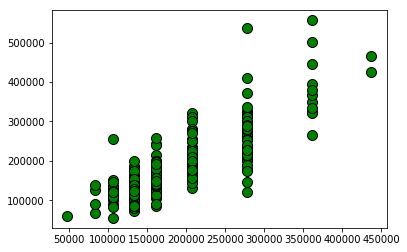

In [49]:
OQd = train.groupby('OverallQual').mean().SalePrice
train['OverallQual'] = train['OverallQual'].replace(OQd.to_dict())
test['OverallQual'] = test['OverallQual'].replace(OQd.to_dict())
x = test.iloc[:,17]
y = test.iloc[:,80]
plotData(x,y)

In [50]:
lst.append('OverallQual')
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

array([0.83811158])

In [51]:
lst.append('OverallCond')
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

array([0.83958049])

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


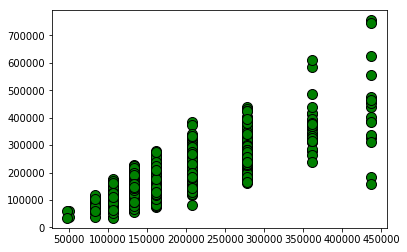

In [52]:
OCd = train.groupby('OverallCond').mean().SalePrice
train['OverallCond'] = train['OverallCond'].replace(OCd.to_dict())
test['OverallCond'] = test['OverallCond'].replace(OCd.to_dict())
x = train.iloc[:,17]
y = train.iloc[:,80]
plotData(x,y)

In [53]:
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

array([0.83836355])

In [54]:
lst

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'BsmtFinSF12',
 'BsmtFinSF1c',
 'BsmtUnfSF2',
 'BsmtUnfSFc',
 '2ndFlrSF2',
 '2ndFlrSFc',
 'OverallQual',
 'OverallCond']

In [55]:
lst.append('ExterQual')
EQd = train.groupby('ExterQual').mean().SalePrice
train['ExterQual'] = train['ExterQual'].replace(EQd.to_dict())
test['ExterQual'] = test['ExterQual'].replace(EQd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.84992533])

In [56]:
EQd = train.groupby('ExterQual').mean().SalePrice
train['ExterQual'] = train['ExterQual'].replace(EQd.to_dict())
test['ExterQual'] = test['ExterQual'].replace(EQd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([0.84992533])

In [57]:
lst.append('ExterCond')
ECd = train.groupby('ExterCond').mean().SalePrice
train['ExterCond'] = train['ExterCond'].replace(ECd.to_dict())
test['ExterCond'] = test['ExterCond'].replace(ECd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.84985731])

In [58]:
lst.append('BsmtQual')
BQd = train.groupby('BsmtQual').mean().SalePrice
train['BsmtQual'] = train['BsmtQual'].replace(BQd.to_dict())
test['BsmtQual'] = test['BsmtQual'].replace(BQd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.85507731])

In [59]:
lst.append('BsmtCond')
BCd = train.groupby('BsmtCond').mean().SalePrice
train['BsmtCond'] = train['BsmtCond'].replace(BCd.to_dict())
test['BsmtCond'] = test['BsmtCond'].replace(BCd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.85483926])

In [60]:
lst.remove('BsmtCond')

In [61]:
lst.append('HeatingQC')
HQd = train.groupby('HeatingQC').mean().SalePrice
train['HeatingQC'] = train['HeatingQC'].replace(HQd.to_dict())
test['HeatingQC'] = test['HeatingQC'].replace(HQd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.85655717])

In [62]:
lst.append('KitchenQual')
KQd = train.groupby('KitchenQual').mean().SalePrice
train['KitchenQual'] = train['KitchenQual'].replace(KQd.to_dict())
test['KitchenQual'] = test['KitchenQual'].replace(KQd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.86087731])

In [63]:
lst.append('FireplaceQu')
FQd = train.groupby('FireplaceQu').mean().SalePrice
train['FireplaceQu'] = train['FireplaceQu'].replace(FQd.to_dict())
test['FireplaceQu'] = test['FireplaceQu'].replace(FQd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.86145991])

In [64]:
lst.remove('FireplaceQu')

In [65]:
lst.append('GarageQual')
GQd = train.groupby('GarageQual').mean().SalePrice
train['GarageQual'] = train['GarageQual'].replace(GQd.to_dict())
test['GarageQual'] = test['GarageQual'].replace(GQd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.86086575])

In [66]:
lst.append('GarageCond')
GCd = train.groupby('GarageCond').mean().SalePrice
train['GarageCond'] = train['GarageCond'].replace(GCd.to_dict())
test['GarageCond'] = test['GarageCond'].replace(GCd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.86095478])

In [67]:
lst.remove('GarageCond')

Other parameters

In [68]:
lst.append('MSSubClass')
MCd = train.groupby('MSSubClass').mean().SalePrice
train['MSSubClass'] = train['MSSubClass'].replace(MCd.to_dict())
test['MSSubClass'] = test['MSSubClass'].replace(MCd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.86273547])

In [69]:
lst.remove('MSSubClass')

In [70]:
lst.append('MSZoning')
MZd = train.groupby('MSZoning').mean().SalePrice
train['MSZoning'] = train['MSZoning'].replace(MZd.to_dict())
test['MSZoning'] = test['MSZoning'].replace(MZd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.86586394])

In [71]:
lst.append('Street')
Sd = train.groupby('Street').mean().SalePrice
train['Street'] = train['Street'].replace(Sd.to_dict())
test['Street'] = test['Street'].replace(Sd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.86585201])

In [72]:
lst.remove('Street')

In [73]:
lst.append('Alley')
Ad = train.groupby('Alley').mean().SalePrice
train['Alley'] = train['Alley'].replace(Ad.to_dict())
test['Alley'] = test['Alley'].replace(Ad.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.86580897])

In [74]:
lst.remove('Alley')

In [75]:
lst.append('LandContour')
LCd = train.groupby('LandContour').mean().SalePrice
train['LandContour'] = train['LandContour'].replace(LCd.to_dict())
test['LandContour'] = test['LandContour'].replace(LCd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.86808318])

In [76]:
lst.append('Utilities')
Ud = train.groupby('Utilities').mean().SalePrice
train['Utilities'] = train['Utilities'].replace(Ud.to_dict())
test['Utilities'] = test['Utilities'].replace(Ud.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.86815883])

In [77]:
lst.remove('Utilities')

In [78]:
lst.append('LotConfig')
LDd = train.groupby('LotConfig').mean().SalePrice
train['LotConfig'] = train['LotConfig'].replace(LDd.to_dict())
test['LotConfig'] = test['LotConfig'].replace(LDd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.87209556])

In [79]:
lst.append('LandSlope')
LSd = train.groupby('LandSlope').mean().SalePrice
train['LandSlope'] = train['LandSlope'].replace(LSd.to_dict())
test['LandSlope'] = test['LandSlope'].replace(LSd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.87423298])

In [80]:
lst.append('Neighborhood')
Nd = train.groupby('Neighborhood').mean().SalePrice
train['Neighborhood'] = train['Neighborhood'].replace(Nd.to_dict())
test['Neighborhood'] = test['Neighborhood'].replace(Nd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.87466253])

In [81]:
lst.append('Condition1')
C1d = train.groupby('Condition1').mean().SalePrice
train['Condition1'] = train['Condition1'].replace(C1d.to_dict())
test['Condition1'] = test['Condition1'].replace(C1d.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.87548295])

In [82]:
lst.append('BldgType')
BTd = train.groupby('BldgType').mean().SalePrice
train['BldgType'] = train['BldgType'].replace(BTd.to_dict())
test['BldgType'] = test['BldgType'].replace(BTd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.87761171])

In [83]:
lst.append('HouseStyle')
HSd = train.groupby('HouseStyle').mean().SalePrice
train['HouseStyle'] = train['HouseStyle'].replace(HSd.to_dict())
test['HouseStyle'] = test['HouseStyle'].replace(HSd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.87774208])

In [84]:
lst.append('RoofStyle')
RSd = train.groupby('RoofStyle').mean().SalePrice
train['RoofStyle'] = train['RoofStyle'].replace(RSd.to_dict())
test['RoofStyle'] = test['RoofStyle'].replace(RSd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.87764112])

In [85]:
lst.remove('RoofStyle')

In [92]:
lst.append('Exterior1st')
E1d = train.groupby('Exterior1st').mean().SalePrice
train['Exterior1st'] = train['Exterior1st'].replace(E1d.to_dict())
test['Exterior1st'] = test['Exterior1st'].replace(E1d.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.87796165])

In [100]:
lst.append('Foundation')
Fdd = train.groupby('Foundation').mean().SalePrice
train['Foundation'] = train['Foundation'].replace(Fdd.to_dict())
test['Foundation'] = test['Foundation'].replace(Fdd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.87801292])

In [101]:
lst.append('BsmtExposure')
BEd = train.groupby('BsmtExposure').mean().SalePrice
train['BsmtExposure'] = train['BsmtExposure'].replace(BEd.to_dict())
test['BsmtExposure'] = test['BsmtExposure'].replace(BEd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.88051017])

In [102]:
lst.append('BsmtFinType1')
BFTd = train.groupby('BsmtFinType1').mean().SalePrice
train['BsmtFinType1'] = train['BsmtFinType1'].replace(BFTd.to_dict())
test['BsmtFinType1'] = test['BsmtFinType1'].replace(BFTd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.8796713])

In [103]:
lst.remove('BsmtFinType1')

In [104]:
lst.append('BsmtFinType2')
BFT2d = train.groupby('BsmtFinType2').mean().SalePrice
train['BsmtFinType2'] = train['BsmtFinType2'].replace(BFT2d.to_dict())
test['BsmtFinType2'] = test['BsmtFinType2'].replace(BFT2d.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.88041116])

In [105]:
lst.append('Heating')
Hd = train.groupby('Heating').mean().SalePrice
train['Heating'] = train['Heating'].replace(Hd.to_dict())
test['Heating'] = test['Heating'].replace(Hd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.88035591])

In [106]:
lst.remove('Heating')

In [107]:
lst.append('CentralAir')
CAd = train.groupby('CentralAir').mean().SalePrice
train['CentralAir'] = train['CentralAir'].replace(CAd.to_dict())
test['CentralAir'] = test['CentralAir'].replace(CAd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.88066892])

In [108]:
lst.append('Electrical')
Ed = train.groupby('Electrical').mean().SalePrice
train['Electrical'] = train['Electrical'].replace(Ed.to_dict())
test['Electrical'] = test['Electrical'].replace(Ed.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.880121])

In [109]:
lst.remove('Electrical')

In [110]:
lst.append('BsmtFullBath')
BFBd = train.groupby('BsmtFullBath').mean().SalePrice
train['BsmtFullBath'] = train['BsmtFullBath'].replace(BFBd.to_dict())
test['BsmtFullBath'] = test['BsmtFullBath'].replace(BFBd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.88082563])

In [111]:
lst.append('BsmtHalfBath')
BHBd = train.groupby('BsmtHalfBath').mean().SalePrice
train['BsmtHalfBath'] = train['BsmtHalfBath'].replace(BHBd.to_dict())
test['BsmtHalfBath'] = test['BsmtHalfBath'].replace(BHBd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.88061294])

In [112]:
lst.append('FullBath')
FBd = train.groupby('FullBath').mean().SalePrice
train['FullBath'] = train['FullBath'].replace(FBd.to_dict())
test['FullBath'] = test['FullBath'].replace(FBd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.88059987])

In [113]:
lst.remove('FullBath')

In [114]:
lst.append('HalfBath')
HBd = train.groupby('HalfBath').mean().SalePrice
train['HalfBath'] = train['HalfBath'].replace(HBd.to_dict())
test['HalfBath'] = test['HalfBath'].replace(HBd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.88146593])

In [115]:
lst.append('BedroomAbvGr')
BAGd = train.groupby('BedroomAbvGr').mean().SalePrice
train['BedroomAbvGr'] = train['BedroomAbvGr'].replace(BAGd.to_dict())
test['BedroomAbvGr'] = test['BedroomAbvGr'].replace(BAGd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.88158566])

In [116]:
lst.append('TotRmsAbvGrd')
TRAGd = train.groupby('TotRmsAbvGrd').mean().SalePrice
train['TotRmsAbvGrd'] = train['TotRmsAbvGrd'].replace(TRAGd.to_dict())
test['TotRmsAbvGrd'] = test['TotRmsAbvGrd'].replace(TRAGd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.88224989])

In [117]:
lst.append('Functional')
Fcd = train.groupby('Functional').mean().SalePrice
train['Functional'] = train['Functional'].replace(Fcd.to_dict())
test['Functional'] = test['Functional'].replace(Fcd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.88379983])

In [118]:
lst.append('Fireplaces')
Fpd = train.groupby('Fireplaces').mean().SalePrice
train['Fireplaces'] = train['Fireplaces'].replace(Fpd.to_dict())
test['Fireplaces'] = test['Fireplaces'].replace(Fpd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.88303034])

In [119]:
lst.append('GarageType')
GTd = train.groupby('GarageType').mean().SalePrice
train['GarageType'] = train['GarageType'].replace(GTd.to_dict())
test['GarageType'] = test['GarageType'].replace(GTd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.88206044])

In [120]:
lst.remove('GarageType')

In [121]:
lst.append('GarageCars')
GCd = train.groupby('GarageCars').mean().SalePrice
train['GarageCars'] = train['GarageCars'].replace(GCd.to_dict())
test['GarageCars'] = test['GarageCars'].replace(GCd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.88479037])

In [122]:
lst.append('GarageCond')
GCdd = train.groupby('GarageCond').mean().SalePrice
train['GarageCond'] = train['GarageCond'].replace(GCdd.to_dict())
test['GarageCond'] = test['GarageCond'].replace(GCdd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.88491004])

In [123]:
lst.append('PavedDrive')
PDd = train.groupby('PavedDrive').mean().SalePrice
train['PavedDrive'] = train['PavedDrive'].replace(PDd.to_dict())
test['PavedDrive'] = test['PavedDrive'].replace(PDd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.8852394])

In [124]:
lst.append('Fence')
Fncd = train.groupby('Fence').mean().SalePrice
train['Fence'] = train['Fence'].replace(Fncd.to_dict())
test['Fence'] = test['Fence'].replace(Fncd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.88529046])

In [125]:
lst.append('SaleType')
STd = train.groupby('SaleType').mean().SalePrice
train['SaleType'] = train['SaleType'].replace(STd.to_dict())
test['SaleType'] = test['SaleType'].replace(STd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.88621918])

In [126]:
lst.append('SaleCondition')
SCd = train.groupby('SaleCondition').mean().SalePrice
train['SaleCondition'] = train['SaleCondition'].replace(SCd.to_dict())
test['SaleCondition'] = test['SaleCondition'].replace(SCd.to_dict())
X = np.asarray(train[lst])
y = np.asarray(train['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)
R2_score(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([0.88746])

So, now we know how the response variable depends on different input variables.

In [134]:
RMSE(np.asarray(test[lst]), regr, np.asarray(test[['SalePrice']]))

26516.399618539162

In [127]:
lst

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'BsmtFinSF12',
 'BsmtFinSF1c',
 'BsmtUnfSF2',
 'BsmtUnfSFc',
 '2ndFlrSF2',
 '2ndFlrSFc',
 'OverallQual',
 'OverallCond',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'HeatingQC',
 'KitchenQual',
 'GarageQual',
 'MSZoning',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'Exterior1st',
 'Exterior1st',
 'Foundation',
 'Foundation',
 'BsmtExposure',
 'BsmtFinType2',
 'CentralAir',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

Now, we just need to use all of the training data to train our model and find the response variables of the testing set.  

In [143]:
train_df['BsmtFinSF12'] = train_df['BsmtFinSF1']*train_df['BsmtFinSF1'] 
train_df['BsmtFinSF1c'] = 1
train_df['BsmtUnfSF2'] = train_df['BsmtUnfSF']*train_df['BsmtUnfSF'] 
train_df['BsmtUnfSFc'] = 1
train_df['2ndFlrSF2'] = train_df['2ndFlrSF']*train_df['2ndFlrSF'] 
train_df['2ndFlrSFc'] = 1

In [144]:
test_df['BsmtFinSF12'] = test_df['BsmtFinSF1']*test_df['BsmtFinSF1'] 
test_df['BsmtFinSF1c'] = 1
test_df['BsmtUnfSF2'] = test_df['BsmtUnfSF']*test_df['BsmtUnfSF'] 
test_df['BsmtUnfSFc'] = 1
test_df['2ndFlrSF2'] = test_df['2ndFlrSF']*test_df['2ndFlrSF'] 
test_df['2ndFlrSFc'] = 1

In [140]:
OQd = train_df.groupby('OverallQual').mean().SalePrice
OCd = train_df.groupby('OverallCond').mean().SalePrice
EQd = train_df.groupby('ExterQual').mean().SalePrice
ECd = train_df.groupby('ExterCond').mean().SalePrice
BQd = train_df.groupby('BsmtQual').mean().SalePrice
HQd = train_df.groupby('HeatingQC').mean().SalePrice
KQd = train_df.groupby('KitchenQual').mean().SalePrice
GQd = train_df.groupby('GarageQual').mean().SalePrice
MZd = train_df.groupby('MSZoning').mean().SalePrice
LCtd = train_df.groupby('LandContour').mean().SalePrice
LCgd = train_df.groupby('LotConfig').mean().SalePrice
LSd = train_df.groupby('LandSlope').mean().SalePrice
Nd = train_df.groupby('Neighborhood').mean().SalePrice
C1d = train_df.groupby('Condition1').mean().SalePrice
HSd = train_df.groupby('HouseStyle').mean().SalePrice
E1d = train_df.groupby('Exterior1st').mean().SalePrice
Fd = train_df.groupby('Foundation').mean().SalePrice
BEd = train_df.groupby('BsmtExposure').mean().SalePrice
BFT2d = train_df.groupby('BsmtFinType2').mean().SalePrice
CAd = train_df.groupby('CentralAir').mean().SalePrice
BFBd = train_df.groupby('BsmtFullBath').mean().SalePrice
BHBd = train_df.groupby('BsmtHalfBath').mean().SalePrice
HBd = train_df.groupby('HalfBath').mean().SalePrice
BAGd = train_df.groupby('BedroomAbvGr').mean().SalePrice
TRAGd = train_df.groupby('TotRmsAbvGrd').mean().SalePrice
Fcd = train_df.groupby('Functional').mean().SalePrice
Fpd = train_df.groupby('Fireplaces').mean().SalePrice
GCd = train_df.groupby('GarageCars').mean().SalePrice
GCnd = train_df.groupby('GarageCond').mean().SalePrice
PDd = train_df.groupby('PavedDrive').mean().SalePrice
Fncd = train_df.groupby('Fence').mean().SalePrice
STd = train_df.groupby('SaleType').mean().SalePrice
SCd = train_df.groupby('SaleCondition').mean().SalePrice
BTd = train_df.groupby('BldgType').mean().SalePrice

In [141]:
train_df['SaleCondition'] = train_df['SaleCondition'].replace(SCd.to_dict())
test_df['SaleCondition'] = test_df['SaleCondition'].replace(SCd.to_dict())

train_df['BldgType'] = train_df['BldgType'].replace(BTd.to_dict())
test_df['BldgType'] = test_df['BldgType'].replace(BTd.to_dict())

train_df['SaleType'] = train_df['SaleType'].replace(STd.to_dict())
test_df['SaleType'] = test_df['SaleType'].replace(STd.to_dict())

train_df['Fence'] = train_df['Fence'].replace(Fncd.to_dict())
test_df['Fence'] = test_df['Fence'].replace(Fncd.to_dict())

train_df['PavedDrive'] = train_df['PavedDrive'].replace(PDd.to_dict())
test_df['PavedDrive'] = test_df['PavedDrive'].replace(PDd.to_dict())

train_df['GarageCond'] = train_df['GarageCond'].replace(GCnd.to_dict())
test_df['GarageCond'] = test_df['GarageCond'].replace(GCnd.to_dict())

train_df['GarageCars'] = train_df['GarageCars'].replace(GCd.to_dict())
test_df['GarageCars'] = test_df['GarageCars'].replace(GCd.to_dict())

train_df['ExterCond'] = train_df['ExterCond'].replace(ECd.to_dict())
test_df['ExterCond'] = test_df['ExterCond'].replace(ECd.to_dict())

train_df['Fireplaces'] = train_df['Fireplaces'].replace(Fpd.to_dict())
test_df['Fireplaces'] = test_df['Fireplaces'].replace(Fpd.to_dict())

train_df['Functional'] = train_df['Functional'].replace(Fcd.to_dict())
test_df['Functional'] = test_df['Functional'].replace(Fcd.to_dict())

train_df['TotRmsAbvGrd'] = train_df['TotRmsAbvGrd'].replace(TRAGd.to_dict())
test_df['TotRmsAbvGrd'] = test_df['TotRmsAbvGrd'].replace(TRAGd.to_dict())

train_df['BedroomAbvGr'] = train_df['BedroomAbvGr'].replace(BAGd.to_dict())
test_df['BedroomAbvGr'] = test_df['BedroomAbvGr'].replace(BAGd.to_dict())

train_df['HalfBath'] = train_df['HalfBath'].replace(HBd.to_dict())
test_df['HalfBath'] = test_df['HalfBath'].replace(HBd.to_dict())

train_df['BsmtHalfBath'] = train_df['BsmtHalfBath'].replace(BHBd.to_dict())
test_df['BsmtHalfBath'] = test_df['BsmtHalfBath'].replace(BHBd.to_dict())

train_df['BsmtFullBath'] = train_df['BsmtFullBath'].replace(BFBd.to_dict())
test_df['BsmtFullBath'] = test_df['BsmtFullBath'].replace(BFBd.to_dict())

train_df['CentralAir'] = train_df['CentralAir'].replace(CAd.to_dict())
test_df['CentralAir'] = test_df['CentralAir'].replace(CAd.to_dict())

train_df['BsmtFinType2'] = train_df['BsmtFinType2'].replace(BFT2d.to_dict())
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].replace(BFT2d.to_dict())

train_df['BsmtExposure'] = train_df['BsmtExposure'].replace(BEd.to_dict())
test_df['BsmtExposure'] = test_df['BsmtExposure'].replace(BEd.to_dict())

train_df['Foundation'] = train_df['Foundation'].replace(Fd.to_dict())
test_df['Foundation'] = test_df['Foundation'].replace(Fd.to_dict())

train_df['Exterior1st'] = train_df['Exterior1st'].replace(E1d.to_dict())
test_df['Exterior1st'] = test_df['Exterior1st'].replace(E1d.to_dict())

train_df['HouseStyle'] = train_df['HouseStyle'].replace(HSd.to_dict())
test_df['HouseStyle'] = test_df['HouseStyle'].replace(HSd.to_dict())

train_df['Condition1'] = train_df['Condition1'].replace(C1d.to_dict())
test_df['Condition1'] = test_df['Condition1'].replace(C1d.to_dict())

train_df['Neighborhood'] = train_df['Neighborhood'].replace(Nd.to_dict())
test_df['Neighborhood'] = test_df['Neighborhood'].replace(Nd.to_dict())

train_df['LandSlope'] = train_df['LandSlope'].replace(LSd.to_dict())
test_df['LandSlope'] = test_df['LandSlope'].replace(LSd.to_dict())

train_df['LotConfig'] = train_df['LotConfig'].replace(LCgd.to_dict())
test_df['LotConfig'] = test_df['LotConfig'].replace(LCgd.to_dict())

train_df['LandContour'] = train_df['LandContour'].replace(LCtd.to_dict())
test_df['LandContour'] = test_df['LandContour'].replace(LCtd.to_dict())

train_df['MSZoning'] = train_df['MSZoning'].replace(MZd.to_dict())
test_df['MSZoning'] = test_df['MSZoning'].replace(MZd.to_dict())

train_df['GarageQual'] = train_df['GarageQual'].replace(GQd.to_dict())
test_df['GarageQual'] = test_df['GarageQual'].replace(GQd.to_dict())

train_df['KitchenQual'] = train_df['KitchenQual'].replace(KQd.to_dict())
test_df['KitchenQual'] = test_df['KitchenQual'].replace(KQd.to_dict())

train_df['HeatingQC'] = train_df['HeatingQC'].replace(HQd.to_dict())
test_df['HeatingQC'] = test_df['HeatingQC'].replace(HQd.to_dict())

train_df['BsmtQual'] = train_df['BsmtQual'].replace(BQd.to_dict())
test_df['BsmtQual'] = test_df['BsmtQual'].replace(BQd.to_dict())

train_df['ExterQual'] = train_df['ExterQual'].replace(EQd.to_dict())
test_df['ExterQual'] = test_df['ExterQual'].replace(EQd.to_dict())

train_df['OverallCond'] = train_df['OverallCond'].replace(OCd.to_dict())
test_df['OverallCond'] = test_df['OverallCond'].replace(OCd.to_dict())

train_df['OverallQual'] = train_df['OverallQual'].replace(OQd.to_dict())
test_df['OverallQual'] = test_df['OverallQual'].replace(OQd.to_dict())


In [145]:
X = np.asarray(train_df[lst])
y = np.asarray(train_df['SalePrice'])
X = X.astype(float)
X = np.nan_to_num(X)
regr = linear_model.LinearRegression()
regr.fit (X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Finally giving out the response variable for the test set.

In [146]:
test_df['SalePrice'] = np.dot(np.asarray(test_df[lst]),regr.coef_)+regr.intercept_

In [147]:
test_df

Id  MSSubClass       MSZoning  LotFrontage  LotArea Street Alley  \
0     1461          20  131558.375000         80.0    11622   Pave     0   
1     1462          20  191004.994787         81.0    14267   Pave     0   
2     1463          60  191004.994787         74.0    13830   Pave     0   
3     1464          60  191004.994787         78.0     9978   Pave     0   
4     1465         120  191004.994787         43.0     5005   Pave     0   
5     1466          60  191004.994787         75.0    10000   Pave     0   
6     1467          20  191004.994787          0.0     7980   Pave     0   
7     1468          60  191004.994787         63.0     8402   Pave     0   
8     1469          20  191004.994787         85.0    10176   Pave     0   
9     1470          20  191004.994787         70.0     8400   Pave     0   
10    1471         120  131558.375000         26.0     5858   Pave     0   
11    1472         160  126316.830275         21.0     1680   Pave     0   
12    1473         160  126316.830275         21.0     1680   Pave     0   
13    1474         160  191004.994787         24.0     2280   Pave     0   
14    1475         120  191004.994787         24.0     2280   Pave     0   
15    1476          60  191004.994787        102.0    12858   Pave     0   
16    1477          20  191004.994787         94.0    12883   Pave     0   
17    1478          20  191004.994787         90.0    11520   Pave     0   
18    1479          20  191004.994787         79.0    14122   Pave     0   
19    1480          20  191004.994787        110.0    14300   Pave     0   
20    1481          60  191004.994787        105.0    13650   Pave     0   
21    1482         120  191004.994787         41.0     7132   Pave     0   
22    1483          20  191004.994787        100.0    18494   Pave     0   
23    1484         120  191004.994787         43.0     3203   Pave     0   
24    1485          80  191004.994787         67.0    13300   Pave     0   
25    1486          60  191004.994787         63.0     8577   Pave     0   
26    1487          60  191004.994787         60.0    17433   Pave     0   
27    1488          20  191004.994787         73.0     8987   Pave     0   
28    1489          20  214014.061538         92.0     9215   Pave     0   
29    1490          20  214014.061538         84.0    10440   Pave     0   
30    1491          60  191004.994787         70.0    11920   Pave     0   
31    1492          30  131558.375000         70.0     9800   Pave     0   
32    1493          20  191004.994787         39.0    15410   Pave     0   
33    1494          60  191004.994787         85.0    13143   Pave     0   
34    1495          60  191004.994787         88.0    11134   Pave     0   
35    1496         120  214014.061538         25.0     4835   Pave     0   
36    1497         160  214014.061538         39.0     3515   Pave  Pave   
37    1498         160  214014.061538         30.0     3215   Pave  Pave   
38    1499         160  214014.061538         24.0     2544   Pave  Pave   
39    1500         160  214014.061538         24.0     2544   Pave  Pave   
40    1501         160  214014.061538          0.0     2980   Pave     0   
41    1502         160  214014.061538          0.0     2403   Pave     0   
42    1503          20  214014.061538         57.0    12853   Pave  Pave   
43    1504          60  214014.061538         68.0     7379   Pave     0   
44    1505          20  214014.061538         80.0     8000   Pave     0   
45    1506          20  191004.994787          0.0    10456   Pave     0   
46    1507          60  191004.994787         80.0    10791   Pave     0   
47    1508          50  191004.994787          0.0    18837   Pave     0   
48    1509          60  191004.994787         80.0     9600   Pave     0   
49    1510          20  191004.994787         80.0     9600   Pave     0   
50    1511          20  191004.994787         90.0     9900   Pave     0   
51    1512          20  191004.994787         88.0     9